In [2]:
import pandas as pd
import seaborn as sns
import rho_plus as rp
from baysic.utils import quick_view, json_to_df
IS_DARK = True
theme, cs = rp.mpl_setup(IS_DARK)
rp.plotly_setup(IS_DARK)

No module named 'phonopy'


In [3]:
df = pd.read_pickle('merged_test_data3.pkl')
task_df = df.query('CrystalSystem == "Cubic"').sort_values('nsites')
task_df.head()

,material_id,formula_pretty,nsites,spacegroup,nelements,elements_list,CrystalSystem,category,nontrivial_coordinates,struct
160,mp-1121,GaCo,2,221,2,Co Ga,Cubic,binary_easy,0,"[[1.42361461 1.42361461 1.42361461] Ga, [0. 0...."
166,mp-2226,DyPd,2,221,2,Dy Pd,Cubic,binary_easy,0,"[[0. 0. 0.] Dy, [1.74230512 1.74230512 1.74230..."
164,mp-1169,ScCu,2,221,2,Cu Sc,Cubic,binary_easy,0,"[[1.62043406 1.62043406 1.62043406] Sc, [0. 0...."
163,mp-2334,DyCu,2,221,2,Cu Dy,Cubic,binary_easy,0,"[[0. 0. 0.] Dy, [1.7180388 1.7180388 1.7180388..."
157,mp-30746,YIr,2,221,2,Ir Y,Cubic,binary_easy,0,"[[1.708167 1.708167 1.708167] Y, [0. 0. 0.] Ir]"


In [4]:
from pathlib import Path

run_id = Path('logs/09-29/1')

inds = []
dfs = []
for i, struct in zip(task_df.index, task_df['struct']):
    path = run_id / f"{struct.formula.replace(' ', '')}.json"
    if path.exists():
        dfs.append(json_to_df(path))
        inds.append(i)

In [5]:
import numpy as np


all_runs = pd.concat(dfs)
all_runs['i'] = np.repeat(inds, list(map(len, dfs)))

In [6]:
combo = pd.merge(task_df.reset_index(), all_runs, left_on='index', right_on='i')
combo.head()

,index,material_id,formula_pretty,nsites,spacegroup,nelements,elements_list,CrystalSystem,category,nontrivial_coordinates,struct,gen,e_form,wsyms,lat_a,lat_vol,i
0,160,mp-1121,GaCo,2,221,2,Co Ga,Cubic,binary_easy,0,"[[1.42361461 1.42361461 1.42361461] Ga, [0. 0....","[[1.52779448 1.52779448 1.52779448] Ga, [0. 0....",0.103445,b_a,3.055589,28.528885,160
1,160,mp-1121,GaCo,2,221,2,Co Ga,Cubic,binary_easy,0,"[[1.42361461 1.42361461 1.42361461] Ga, [0. 0....","[[1.4851613 1.4851613 1.4851613] Ga, [0. 0. 0....",-0.151336,b_a,2.970323,26.206611,160
2,160,mp-1121,GaCo,2,221,2,Co Ga,Cubic,binary_easy,0,"[[1.42361461 1.42361461 1.42361461] Ga, [0. 0....","[[0. 0. 0.] Ga, [1.32992351 1.32992351 1.32992...",-0.320825,a_b,2.659847,18.817849,160
3,160,mp-1121,GaCo,2,221,2,Co Ga,Cubic,binary_easy,0,"[[1.42361461 1.42361461 1.42361461] Ga, [0. 0....","[[1.39672089 1.39672089 1.39672089] Ga, [0. 0....",-0.380303,b_a,2.793442,21.798111,160
4,160,mp-1121,GaCo,2,221,2,Co Ga,Cubic,binary_easy,0,"[[1.42361461 1.42361461 1.42361461] Ga, [0. 0....","[[0. 0. 0.] Ga, [1.55866635 1.55866635 1.55866...",0.293404,a_b,3.117333,30.293501,160


In [7]:
# from pymatgen.symmetry.analyzer import SpacegroupAnalyzer
from pyxtal import Wyckoff_position

# sgas = [SpacegroupAnalyzer(struct) for struct in combo['gen']]
# combo['symm'] = [sga.get_symmetrized_structure() for sga in sgas]
# combo['conv'] = [sga.get_conventional_standard_structure() for sga in sgas]
# combo['run_sg'] = [sga.get_space_group_number() for sga in sgas]


# from baysic.utils import df_to_json

# df_to_json(combo.drop(columns='wps'), 'combo.json')

combo = json_to_df('combo.json')
combo['wps'] = [[Wyckoff_position.from_group_and_letter(num, let) for let in wsyms.split('_')] for num, wsyms in combo[['run_sg', 'wsyms']].values]

/home/nicholas/anaconda3/envs/baysic/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/nicholas/anaconda3/envs/baysic/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/nicholas/anaconda3/envs/baysic/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/nicholas/anaconda3/envs/baysic/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed i

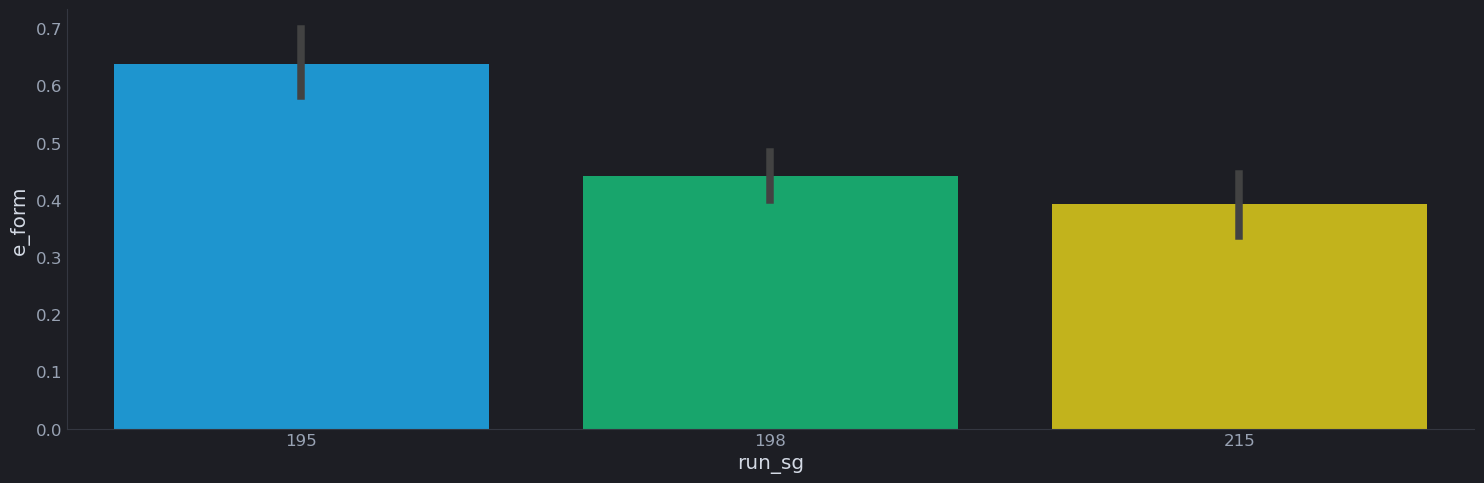

In [8]:
sns.catplot(combo.query('formula_pretty == "Ta4GaTe4Se4"'), x='run_sg', y='e_form', kind='bar', aspect=3)

In [9]:
best_row = combo.query('formula_pretty == "Ta4GaTe4Se4"').sort_values('e_form').iloc[0]
quick_view(best_row['gen'], port=8052)

In [10]:
from copy import deepcopy
from baysic.structure_evaluation import relaxed_energy


best_struct, best_e_form = relaxed_energy(deepcopy(best_row['gen']))
print(best_e_form / 4)
quick_view(best_struct, port=8052)

-1.1366671048677885


In [11]:
quick_view(best_row['conv'], port=8052)

In [12]:
combo.head()

,index,material_id,formula_pretty,nsites,spacegroup,nelements,elements_list,CrystalSystem,category,nontrivial_coordinates,...,gen,e_form,wsyms,lat_a,lat_vol,i,symm,conv,run_sg,wps
0,160,mp-1121,GaCo,2,221,2,Co Ga,Cubic,binary_easy,0,...,"[[1.52779448 1.52779448 1.52779448] Ga, [0. 0....",0.103445,b_a,3.055589,28.528885,160,"[[1.52779448 1.52779448 1.52779448] Ga, [0. 0....","[[1.52779448 1.52779448 1.52779448] Ga, [0. 0....",221,[(Rot:\n[[0. 0. 0.]\n [0. 0. 0.]\n [0. 0. 0.]]...
1,160,mp-1121,GaCo,2,221,2,Co Ga,Cubic,binary_easy,0,...,"[[1.4851613 1.4851613 1.4851613] Ga, [0. 0. 0....",-0.151336,b_a,2.970323,26.206611,160,"[[1.4851613 1.4851613 1.4851613] Ga, [0. 0. 0....","[[1.4851613 1.4851613 1.4851613] Ga, [0. 0. 0....",221,[(Rot:\n[[0. 0. 0.]\n [0. 0. 0.]\n [0. 0. 0.]]...
2,160,mp-1121,GaCo,2,221,2,Co Ga,Cubic,binary_easy,0,...,"[[0. 0. 0.] Ga, [1.32992351 1.32992351 1.32992...",-0.320825,a_b,2.659847,18.817849,160,"[[0. 0. 0.] Ga, [1.32992351 1.32992351 1.32992...","[[0. 0. 0.] Ga, [1.32992351 1.32992351 1.32992...",221,[(Rot:\n[[0. 0. 0.]\n [0. 0. 0.]\n [0. 0. 0.]]...
3,160,mp-1121,GaCo,2,221,2,Co Ga,Cubic,binary_easy,0,...,"[[1.39672089 1.39672089 1.39672089] Ga, [0. 0....",-0.380303,b_a,2.793442,21.798111,160,"[[1.39672089 1.39672089 1.39672089] Ga, [0. 0....","[[1.39672089 1.39672089 1.39672089] Ga, [0. 0....",221,[(Rot:\n[[0. 0. 0.]\n [0. 0. 0.]\n [0. 0. 0.]]...
4,160,mp-1121,GaCo,2,221,2,Co Ga,Cubic,binary_easy,0,...,"[[0. 0. 0.] Ga, [1.55866635 1.55866635 1.55866...",0.293404,a_b,3.117333,30.293501,160,"[[0. 0. 0.] Ga, [1.55866635 1.55866635 1.55866...","[[0. 0. 0.] Ga, [1.55866635 1.55866635 1.55866...",221,[(Rot:\n[[0. 0. 0.]\n [0. 0. 0.]\n [0. 0. 0.]]...


In [13]:
pd.value_counts(combo['formula_pretty'])

/tmp/ipykernel_2172069/207913670.py:1: FutureWarning:

pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.



formula_pretty
ZrZnNi4        119
Rb3PrCl6       117
Ba2PrSbO6      116
PaO            115
KRb2ScF6       115
NaPb2IO6       115
MgCu4Sn        114
K2LiInF6       114
K2NaInF6       113
Tb4Al          112
ThB2           112
Ta4GaTe4Se4    111
Ba2UNiO6       110
LaF3           107
LiMgSnAu       107
Ba2YRuO6       107
Ba2YbNbO6      105
Ba2ErSbO6      105
K2LiCrF6       104
MgInCu4        104
Ba2YIrO6       101
CrFeCoSi       101
Sr2MgIrO6      101
Na2CdPb        100
SmH2           100
LiGaSi         100
YIr            100
DyCu           100
DyPd           100
ScCu           100
GaCo           100
LiMg2Ga        100
ErInCu2        100
InFeCo2        100
HfCo2Sn        100
TaGaCo2        100
Li2CuSn        100
LuInCu2        100
Nb3Si          100
CePb3          100
Cr3Ga          100
Ca3SnO         100
DyPb3          100
LuSnPd2        100
LiMgSnPt       100
K2NaAlF6       100
K2NaAlH6       100
Al4Cu2O7       100
Name: count, dtype: int64

In [14]:
combo['comp_nums'] = [''.join([str(int(x)) for x in sorted(struct.composition.values(), reverse=True)]) for struct in combo['struct']]

/home/nicholas/anaconda3/envs/baysic/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/home/nicholas/anaconda3/envs/baysic/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/home/nicholas/anaconda3/envs/baysic/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/home/nicholas/anaconda3/envs/baysic/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/home/nicholas/anaconda3/envs/baysic/lib/python3.10/site-packages/se

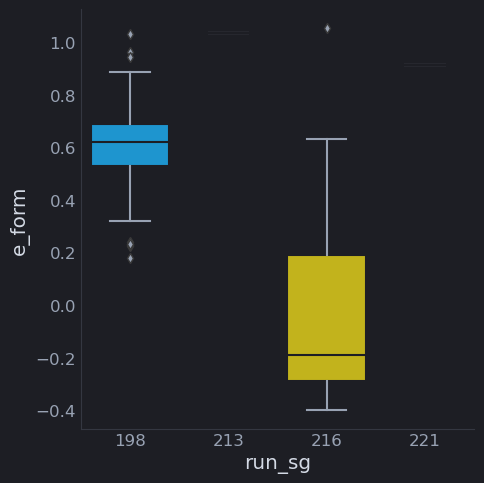

In [15]:
sns.catplot(combo.query('formula_pretty == "ZrZnNi4"'), x='run_sg', y='e_form', kind='box', **rp.boxstyle())

/home/nicholas/anaconda3/envs/baysic/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/home/nicholas/anaconda3/envs/baysic/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/home/nicholas/anaconda3/envs/baysic/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/home/nicholas/anaconda3/envs/baysic/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/home/nicholas/anaconda3/envs/baysic/lib/python3.10/site-packages/se

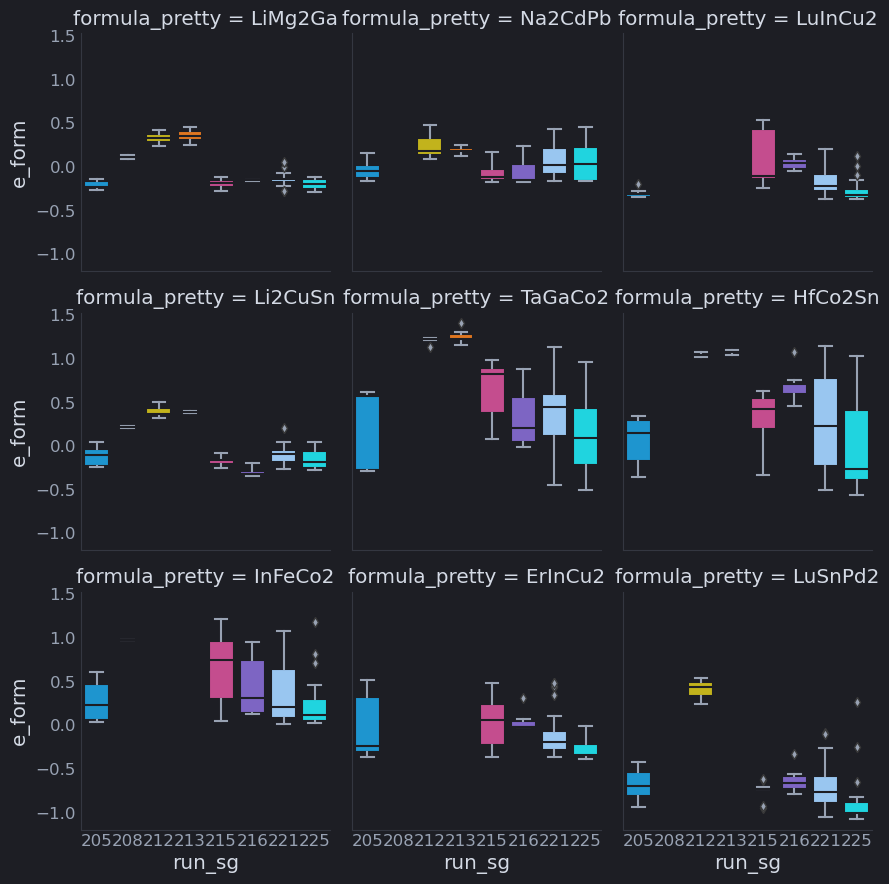

In [16]:
g = sns.catplot(combo.query('comp_nums == "211"'), x='run_sg', y='e_form', kind='box', col='formula_pretty', col_wrap=3, height=3, **rp.boxstyle())

/home/nicholas/anaconda3/envs/baysic/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/home/nicholas/anaconda3/envs/baysic/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/home/nicholas/anaconda3/envs/baysic/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/home/nicholas/anaconda3/envs/baysic/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/home/nicholas/anaconda3/envs/baysic/lib/python3.10/site-packages/se

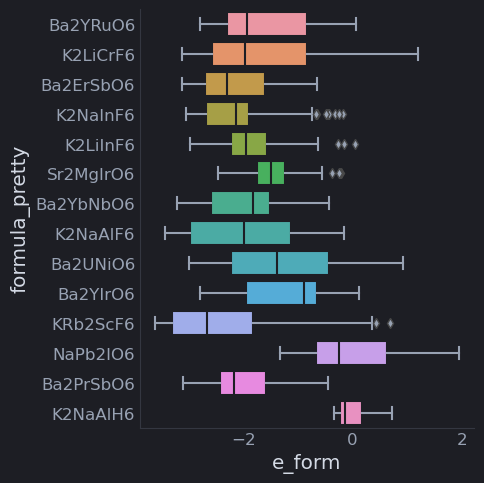

In [17]:
sns.catplot(combo.query('comp_nums == "6211"'), y='formula_pretty', x='e_form', kind='box', **rp.boxstyle())

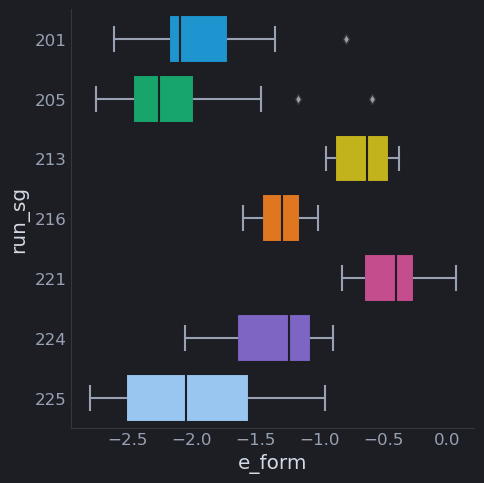

/home/nicholas/anaconda3/envs/baysic/lib/python3.10/site-packages/pymatgen/analysis/local_env.py:4141: UserWarning:

No oxidation states specified on sites! For better results, set the site oxidation states in the structure.

/home/nicholas/anaconda3/envs/baysic/lib/python3.10/site-packages/pymatgen/analysis/local_env.py:3934: UserWarning:

CrystalNN: cannot locate an appropriate radius, covalent or atomic radii will be used, this can lead to non-optimal results.



In [18]:
sns.catplot(combo.query('formula_pretty == "Ba2YRuO6"'), y='run_sg', x='e_form', kind='box', orient='h', **rp.boxstyle())

<Axes: xlabel='nontrivial_coordinates', ylabel='Count'>

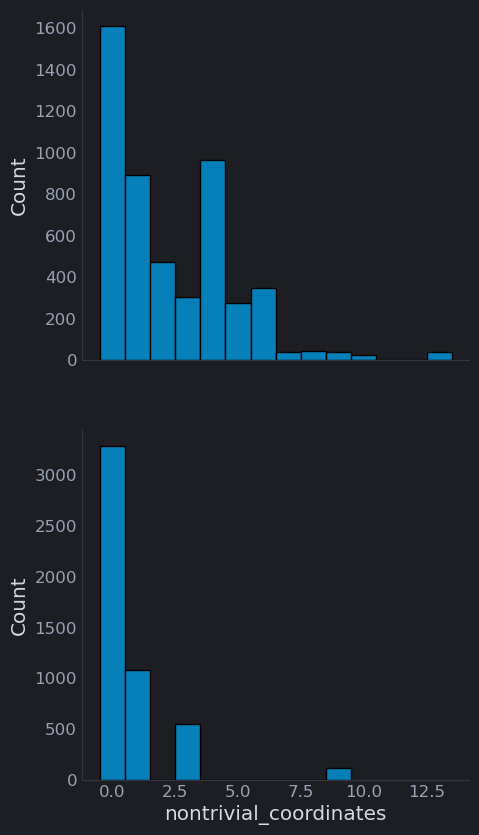

In [87]:
from matplotlib import pyplot as plt


combo['total_dof'] = [sum([wp.get_dof() for wp in wps]) for wps in combo['wps']]
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(5, 10), sharex=True)
sns.histplot(combo['total_dof'], discrete=True, ax=ax1)
sns.histplot(combo['nontrivial_coordinates'], discrete=True, ax=ax2)

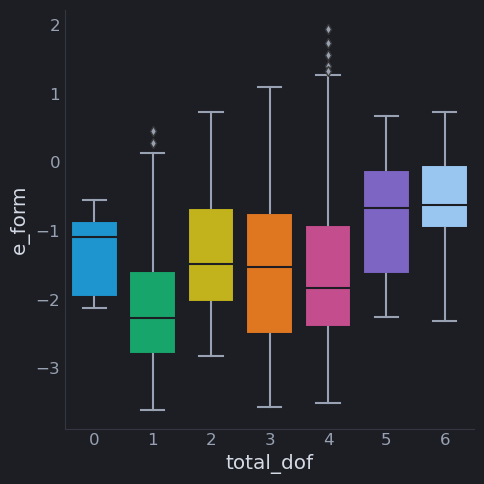

In [89]:
sns.catplot(combo.query('comp_nums == "6211"'), x='total_dof', y='e_form', kind='box', **rp.boxstyle())

<Axes: xlabel='volume_ratio', ylabel='e_form'>

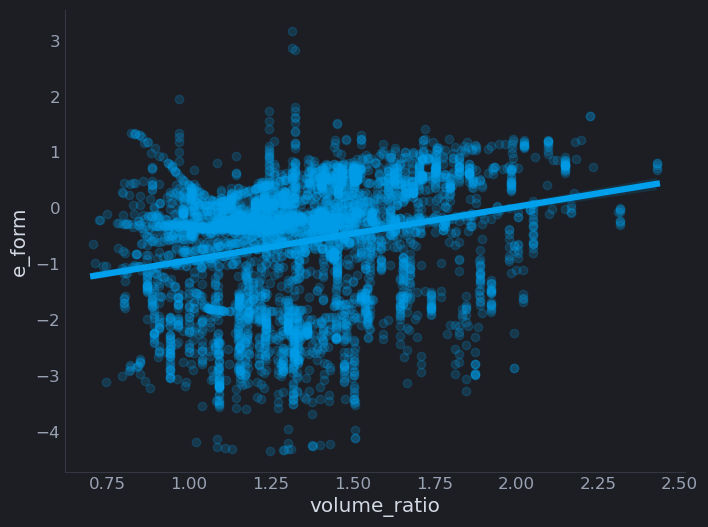

In [103]:
from baysic.lattice import atomic_volume


combo['atom_volume'] = [atomic_volume(row['gen'].composition) for i, row in combo.iterrows()]
combo['volume_ratio'] = combo.eval('lat_vol / atom_volume')
sns.regplot(combo, x='volume_ratio', y='e_form', scatter_kws=dict(edgecolor=None, alpha=0.2))

In [156]:
import pickle
with open('all_wps.pkl', 'rb') as all_wps_pkl:
    all_wps = pickle.load(all_wps_pkl)
len(all_wps)

939

In [158]:
from torch import Value


combo_inds = []
cache = {}

def match_wp(num, index, wp):
    if (num, index) in cache:
        return cache[(num, index)]
    for wp in wps:
        for i, other in enumerate(all_wps):
            if wp.has_equivalent_ops(other):                
                cache[(num, index)] = i
                return i
    raise ValueError("Can't find WP")

for wps in combo['wps']:
    wp_inds = [match_wp(wp.number, wp.index, wp) for wp in wps]
    combo_inds.append(wp_inds)

In [162]:
combo['wp_inds'] = ['_'.join(map(str, inds)) for inds in combo_inds]
combo['wp_sort'] = ['_'.join(map(str, sorted(inds))) for inds in combo_inds]

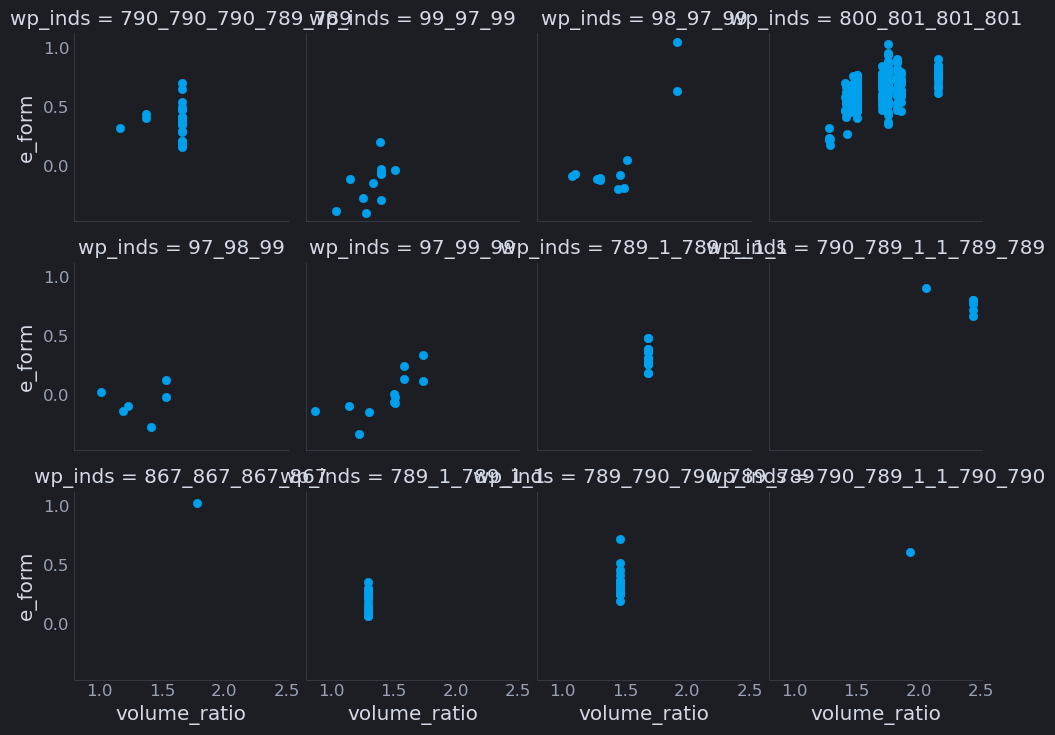

In [171]:
combo['vol_rat_cat'] = combo['volume_ratio'].round(1).astype('category')
sns.relplot(combo.query('comp_nums == "411"'), x='volume_ratio', y='e_form', edgecolor=None, col='wp_inds', col_wrap=4, height=2.5)

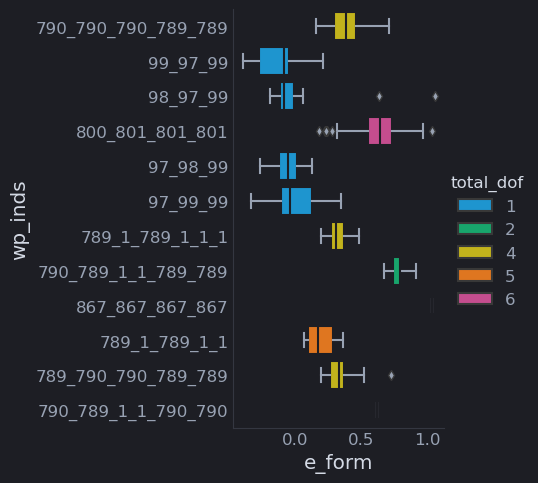

In [238]:
sns.catplot(combo.query('comp_nums == "411"'), y='wp_inds', x='e_form', kind='box', hue='total_dof', dodge=False, **rp.boxstyle())

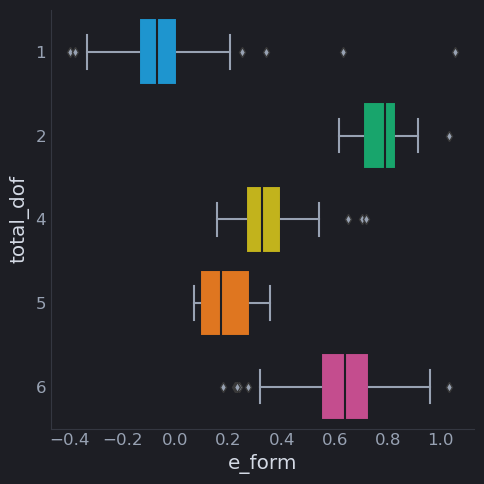

In [242]:
sns.catplot(combo.query('comp_nums == "411"'), y='total_dof', x='e_form', kind='box', orient='h', **rp.boxstyle())

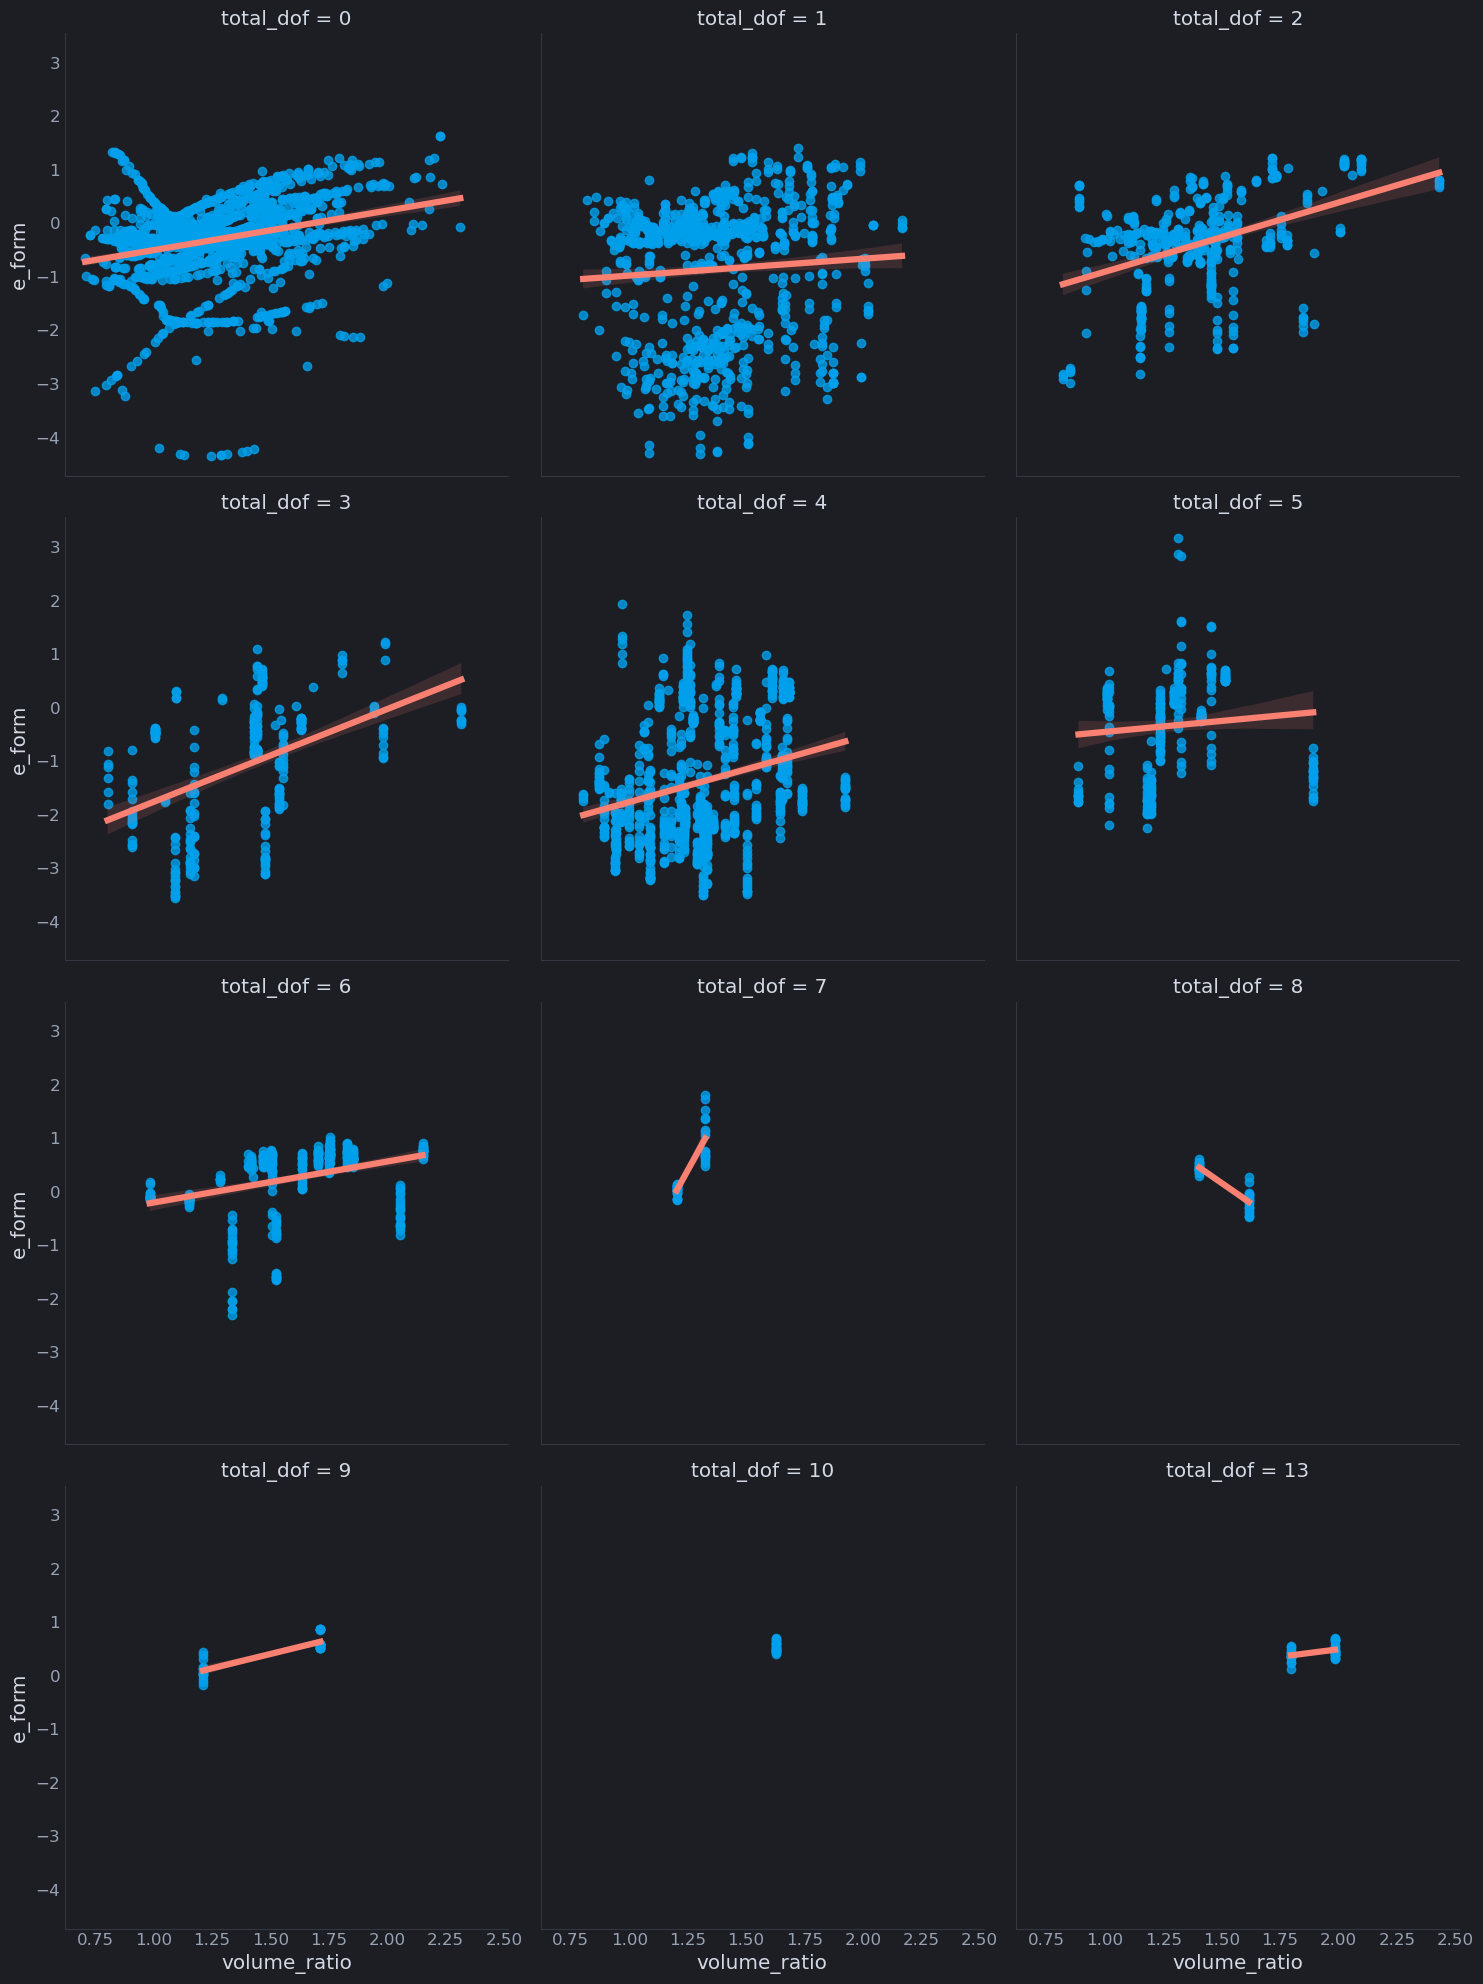

In [255]:
sns.lmplot(combo, x='volume_ratio', y='e_form', col='total_dof', col_wrap=3, line_kws=dict(color='salmon'))

In [270]:
combo['symm'][599].site_labels

[0, 0, 0, 0, 4, 4, 4, 4]